# EXERCISE: t-SNE

_**NOTE: The 3 best solutions will get +1 point to the final grade!**_

We are now 2/3 through the ML course -- it's time to prove yourself a worthy ML practitioner! 🤓

Your task is to fill in this Section. In particular:

- Use markdown and code cells, as if you are writing this part of the notebook for your own students!
- You can use Scikit-learn's implementation of t-SNE, your own, or whatever you prefer.

The Section should include _at least_ the following experiments:

- Embed the small digit data into 2D using t-SNE.
- Embed the small digit data into 3D using t-SNE.
- Comment on the differences you observe between the two plots.
- Comment on the differences you observe with PCA and MDS embeddings in the same target space.
- Embed a _larger_ dataset into 2D using t-SNE, e.g. MNIST, or character emojis, or pokemon images... you choose it!
- Add whatever you think it's worth adding. If you think a t-SNE parameter needs further discussion, or some other aspect is worth discussing, feel free to do it!

Send me your notebooks via email. Participation is not mandatory.

 > **Author**: Lorenzo Neri,
 > **Class**: SMIA - La Sapienza

---


Now we're gonna use t-SNE to embed our datasets

In [1]:
# first, lets import the libs that we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

As we did previously, here we're going to create a subset of our data to make things a little bit easier for the computational time

In [2]:
# Load the digits dataset
digits = load_digits()

# mi creo un subset su cui lavorare
# Select a smaller portion of the dataset (e.g., the first 100 samples)
subset_size = 600
subset_data = digits.data[:subset_size]
subset_target = digits.target[:subset_size]

Now that we have our data lets embed it and plot it!

## 2D embedding

In [3]:
tsne = TSNE(n_components=2, random_state=42)
embedded_data_tsne = tsne.fit_transform(subset_data)

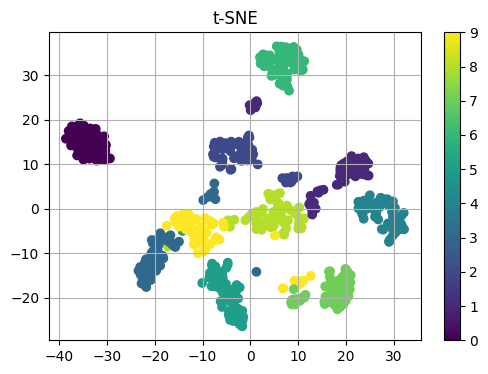

In [4]:
plt.figure(figsize=(6,4))
#          first component on x  , second component on y
plt.scatter(embedded_data_tsne[:,0], embedded_data_tsne[:,1], c = subset_target, cmap = 'viridis')
plt.title('t-SNE')
plt.colorbar()
plt.grid()
plt.show()

What if we want to embed our data in 3 dimensions?

## 3D embedding

In [5]:
tsne3d = TSNE(n_components=3, random_state=42)
embedded_data_tsne3d = tsne3d.fit_transform(subset_data)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


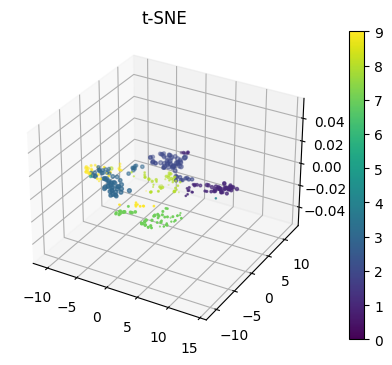

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # Importing this module allows us to create 3D plots

# Visualize the embedded data in 3D
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(embedded_data_tsne3d[:,0], embedded_data_tsne3d[:,1], embedded_data_tsne3d[:,2], c = subset_target, cmap = 'viridis')
plt.title('t-SNE')
plt.grid()
plt.colorbar()
plt.show()

We can also make three 2-Dimensional plots to see better that the points distances for every couple of dimensions

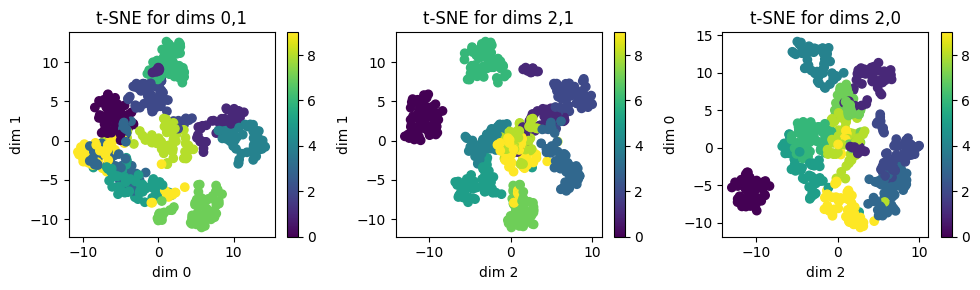

In [7]:
# Create a figure with two subplots
plt.figure(figsize=(10, 3))

# Plot t-SNE embedding for dims 0 and 1
plt.subplot(1, 3, 1)
plt.scatter(embedded_data_tsne3d[:, 0], embedded_data_tsne3d[:, 1], c=subset_target, cmap='viridis')
plt.colorbar()
plt.title('t-SNE for dims 0,1')
plt.xlabel('dim 0')
plt.ylabel('dim 1')


# Plot t-SNE embedding for dims 1 and 2
plt.subplot(1, 3, 2)
plt.scatter( embedded_data_tsne3d[:, 2], embedded_data_tsne3d[:, 1], c=subset_target, cmap='viridis')
plt.colorbar()
plt.title('t-SNE for dims 2,1')
plt.xlabel('dim 2')
plt.ylabel('dim 1')


# Plot t-SNE embedding for dims 2 and 0
plt.subplot(1, 3, 3)
plt.scatter(embedded_data_tsne3d[:, 2], embedded_data_tsne3d[:, 0], c=subset_target, cmap='viridis')
plt.colorbar()
plt.title('t-SNE for dims 2,0')
plt.xlabel('dim 2')
plt.ylabel('dim 0')


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Note that to better see the distances between points you just have to increment the values on ```plt.figure(figsize=(a,b))```






## Comparisons

We've seen how well t-SNE performs, but what about other dimensional scaling methods?

In [8]:
# Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(subset_data)

# Apply MDS
mds = MDS(n_components=2, random_state=42)
x_mds = mds.fit_transform(subset_data)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(subset_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Figure size 1500x500 with 0 Axes>

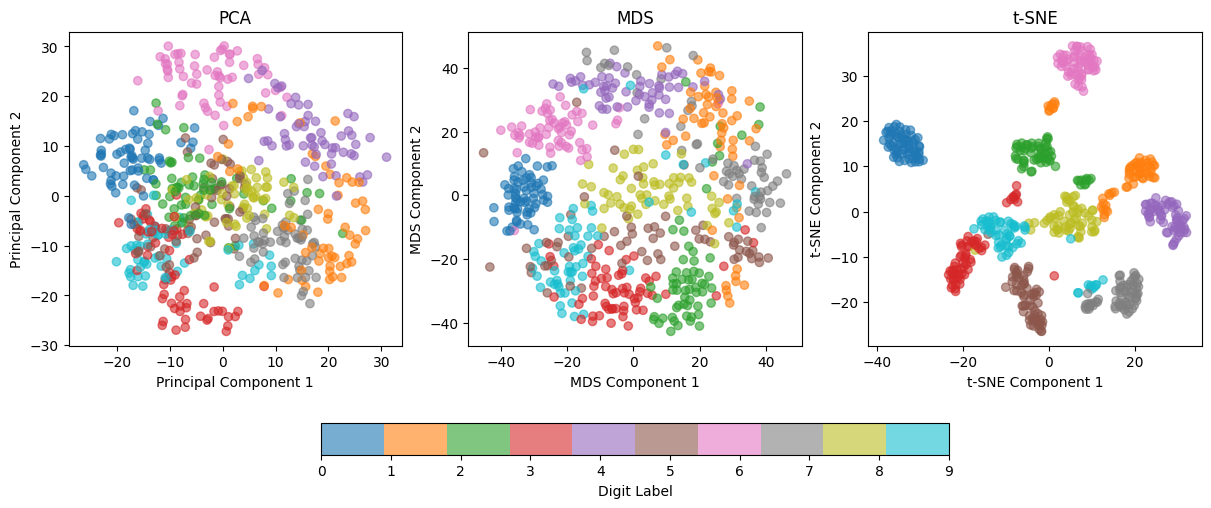

In [9]:
plt.figure(figsize=(15, 5))

# Set up the figure and the grid for the plots
fig, axs = plt.subplots(1, 3, figsize=(12, 5), constrained_layout=True)

# Plot PCA
scatter1 = axs[0].scatter(x_pca[:, 0], x_pca[:, 1], c=subset_target, cmap='tab10', alpha=0.6)
axs[0].set_title('PCA')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# Plot MDS
scatter2 = axs[1].scatter(x_mds[:, 0], x_mds[:, 1], c=subset_target, cmap='tab10', alpha=0.6)
axs[1].set_title('MDS')
axs[1].set_xlabel('MDS Component 1')
axs[1].set_ylabel('MDS Component 2')

# Plot t-SNE
scatter3 = axs[2].scatter(x_tsne[:, 0], x_tsne[:, 1], c=subset_target, cmap='tab10', alpha=0.6)
axs[2].set_title('t-SNE')
axs[2].set_xlabel('t-SNE Component 1')
axs[2].set_ylabel('t-SNE Component 2')

# Add a shared colorbar below the plots
cbar = fig.colorbar(scatter3, ax=axs, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.set_ticks(range(10))
cbar.set_label('Digit Label')

plt.show()

Now let's make a huge plot: we'll embed the digits dataset in three dimension as we previously did, but also using MDS and PCA

In [10]:
# Apply PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(subset_data)

# Apply MDS
mds = MDS(n_components=3, random_state=42)
x_mds = mds.fit_transform(subset_data)

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
x_tsne = tsne.fit_transform(subset_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Figure size 1900x1900 with 0 Axes>

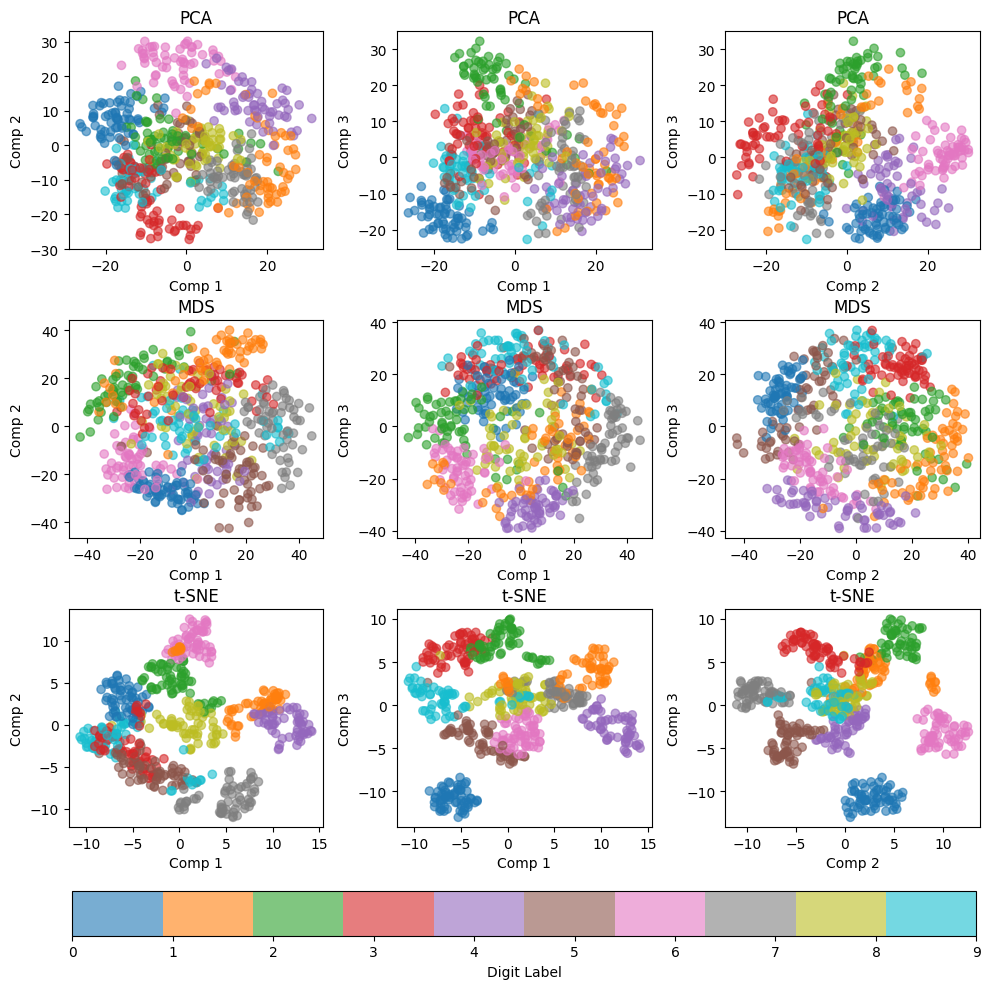

In [11]:
import matplotlib.colors as mcolors
# Set up the figure
plt.figure(figsize=(19, 19))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Define colormap and normalize
cmap = 'tab10'
#norm = mcolors.Normalize(vmin=subset_target.min(), vmax=subset_target.max())

# Plot PCA
s = axes[0, 0].scatter(x_pca[:, 0], x_pca[:, 1], c=subset_target, cmap=cmap, alpha=0.6)
axes[0, 0].set_title('PCA')
axes[0, 0].set_xlabel('Comp 1')
axes[0, 0].set_ylabel('Comp 2')

axes[0, 1].scatter(x_pca[:, 0], x_pca[:, 2], c=subset_target, cmap=cmap, alpha=0.6)
axes[0, 1].set_title('PCA')
axes[0, 1].set_xlabel('Comp 1')
axes[0, 1].set_ylabel('Comp 3')

axes[0, 2].scatter(x_pca[:, 1], x_pca[:, 2], c=subset_target, cmap=cmap, alpha=0.6)
axes[0, 2].set_title('PCA')
axes[0, 2].set_xlabel('Comp 2')
axes[0, 2].set_ylabel('Comp 3')

# Plot MDS
axes[1, 0].scatter(x_mds[:, 0], x_mds[:, 1], c=subset_target, cmap=cmap, alpha=0.6)
axes[1, 0].set_title('MDS')
axes[1, 0].set_xlabel('Comp 1')
axes[1, 0].set_ylabel('Comp 2')

axes[1, 1].scatter(x_mds[:, 0], x_mds[:, 2], c=subset_target, cmap=cmap, alpha=0.6)
axes[1, 1].set_title('MDS')
axes[1, 1].set_xlabel('Comp 1')
axes[1, 1].set_ylabel('Comp 3')

axes[1, 2].scatter(x_mds[:, 1], x_mds[:, 2], c=subset_target, cmap=cmap, alpha=0.6)
axes[1, 2].set_title('MDS')
axes[1, 2].set_xlabel('Comp 2')
axes[1, 2].set_ylabel('Comp 3')

# Plot t-SNE
axes[2, 0].scatter(x_tsne[:, 0], x_tsne[:, 1], c=subset_target, cmap=cmap, alpha=0.6)
axes[2, 0].set_title('t-SNE')
axes[2, 0].set_xlabel('Comp 1')
axes[2, 0].set_ylabel('Comp 2')

axes[2, 1].scatter(x_tsne[:, 0], x_tsne[:, 2], c=subset_target, cmap=cmap, alpha=0.6)
axes[2, 1].set_title('t-SNE')
axes[2, 1].set_xlabel('Comp 1')
axes[2, 1].set_ylabel('Comp 3')

axes[2, 2].scatter(x_tsne[:, 1], x_tsne[:, 2], c=subset_target, cmap=cmap, alpha=0.6)
axes[2, 2].set_title('t-SNE')
axes[2, 2].set_xlabel('Comp 2')
axes[2, 2].set_ylabel('Comp 3')

# Adjust layout
plt.tight_layout()

# Add a shared colorbar
cbar = fig.colorbar(s, ax=axes, orientation='horizontal', fraction=0.05, pad=0.07)
cbar.set_label('Digit Label')

plt.show()

## Going big

Now it is time for us to take things a little bit further!
Let's use a different dataset, like MNIST

In [12]:
from keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Use only a subset of data to speed up t-SNE
x_data = x_train[:10000]
y_data = y_train[:10000]

# Flatten the images
x_data = x_data.reshape(x_data.shape[0], -1)

# Normalize the pixel values to [0, 1]
x_data = x_data / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
tsne = TSNE(n_components=2, random_state=42)
embedded_data_tsne = tsne.fit_transform(x_data)

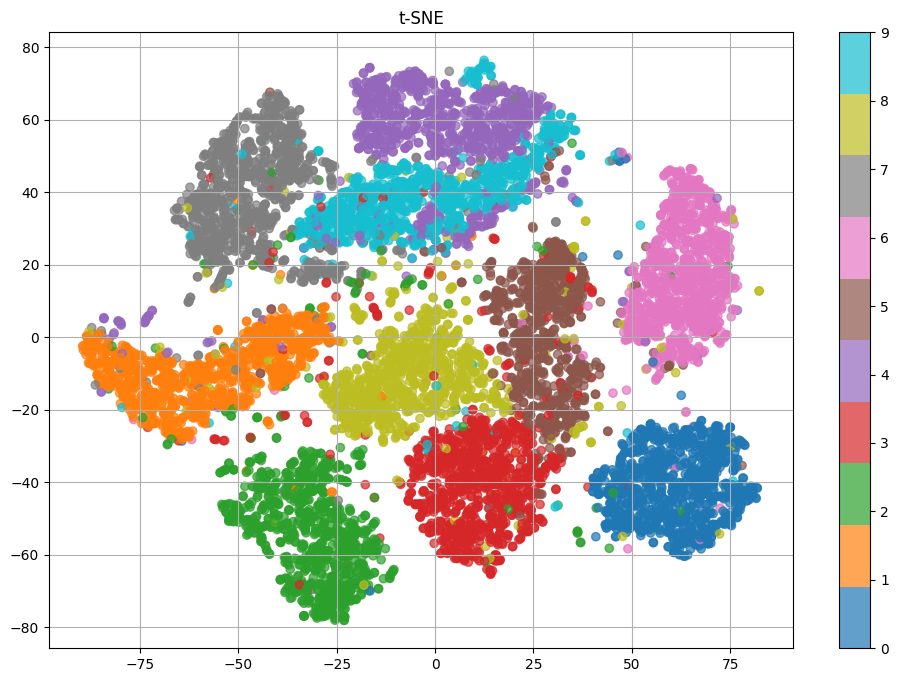

In [14]:
# parametro alpha decide l'opacità di ogni punto
# parametro cmap decide  la color map ovvero il set di colori scelto per il plot
plt.figure(figsize=(12,8))
plt.scatter(embedded_data_tsne[:,0], embedded_data_tsne[:,1], c = y_data, cmap = 'tab10', alpha = 0.7)
plt.title('t-SNE')
plt.colorbar()
plt.grid()
plt.show()

## Going alternative

Tired of number images? What about Pokemon images?

In [15]:
!git clone https://github.com/rileynwong/pokemon-images-dataset-by-type

Cloning into 'pokemon-images-dataset-by-type'...
remote: Enumerating objects: 849, done.
remote: Total 849 (delta 0), reused 0 (delta 0), pack-reused 849
Receiving objects: 100% (849/849), 2.38 MiB | 9.61 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [16]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

dataset_dir = 'pokemon-images-dataset-by-type'

In [17]:
print(os.listdir(dataset_dir))

['normal', 'ice', 'water', 'dragon', 'psychic', 'steel', 'bug', 'ground', 'fighting', 'all', 'fairy', 'electric', 'fire', 'ghost', '.git', 'poison', 'grass', 'dark', 'README.md', 'rock', 'flying']


we see that we also have some files/directories that are not pokemon types, so we create a list containing only the labels (types):


In [18]:
types = {}
i = 0
for file in os.listdir(dataset_dir):
    if file != 'all' and file != 'README.md' and file != '.git':
      print(f'{i}', file)
      types[file] = i
      i += 1

0 normal
1 ice
2 water
3 dragon
4 psychic
5 steel
6 bug
7 ground
8 fighting
9 fairy
10 electric
11 fire
12 ghost
13 poison
14 grass
15 dark
16 rock
17 flying


now the "label map" looks like this:
```
{ type_name : type_id_number }
```

In [19]:
random_type = 'dark'
i = 0
type_path = os.path.join(dataset_dir, random_type)
for pokemon in (os.listdir(type_path)):
    print(i, pokemon)
    i += 1

0 weavile.png
1 pawniard.png
2 purrloin.png
3 deino.png
4 zorua.png
5 poochyena.png
6 zoroark.png
7 yveltal.png
8 absol.png
9 houndour.png
10 scrafty.png
11 vullaby.png
12 darkrai.png
13 sableye.png
14 houndoom.png
15 inkay.png
16 mandibuzz.png
17 zweilous.png
18 malamar.png
19 hydreigon.png
20 umbreon.png
21 sneasel.png
22 liepard.png
23 guzzlord.png
24 mightyena.png
25 bisharp.png
26 murkrow.png
27 honchkrow.png
28 scraggy.png


now we are going to create our dataset built like this:

```
{
  0 : [ pokemon_normal_1, ... ,pokemon_normal_n ],
  ... ,
  17 : [ pokemon_flying_1, ... ,pokemon_flying_n ]
}
```
where ``` pokemon_type_i ``` is numpy array of dimensions (120, 120, 4) that is gonna get flatted out

In [20]:
types_map = {}
target_size = (120, 120)
# since our dataset is not uniformly sized, we are going to resize it
Y = np.zeros((809,))
i = 0
for type in types.keys():
    type_id = types[type]
    types_map[type_id] = []
    type_path = os.path.join(dataset_dir, type)
    first = True

    for pokemon in os.listdir(type_path):

        if pokemon.endswith('.png'):
            fp = os.path.join(type_path, pokemon)

            with open(fp, 'rb') as file:
                img = Image.open(file)
                img.load()
                if img.mode != 'RGBA': # to keep the color information
                    img = img.convert('RGBA')
                img = img.resize(target_size)
                img = np.array(img)
                img = img.flatten()  # flatten the image to a 1D vector
                if first:
                    types_map[type_id] = np.array([img])
                    first = False
                else:
                    types_map[type_id] = np.vstack([types_map[type_id], img])
            Y[i] = type_id
            i +=1


dark
(29, 57600)


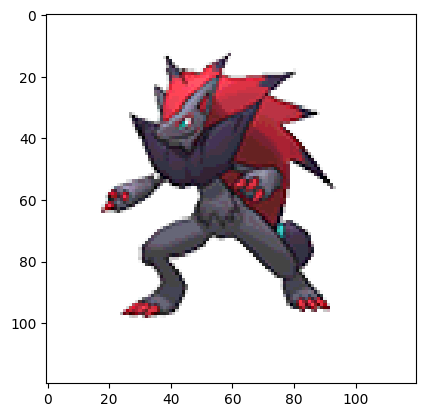

In [21]:
print(random_type)
type_id = types[random_type]
print((np.shape(types_map[type_id])))
plt.imshow(types_map[type_id][6].reshape(120,120,4))

In [22]:
X = np.array(list(types_map.values())[0])
for pokemons in list(types_map.values())[1:]:
    X = np.vstack((X,pokemons))
print(X.shape)

(809, 57600)


In [23]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

<ipython-input-24-cd174808409e>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', 18)


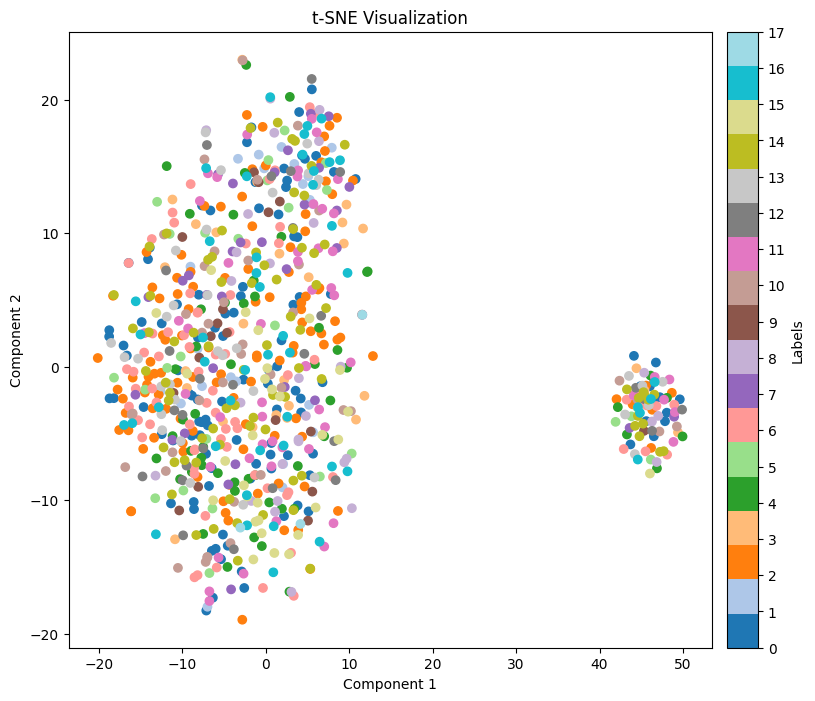

In [24]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a colormap
cmap = cm.get_cmap('tab20', 18)

# Normalize the colorbar to have 18 discrete intervals
norm = mcolors.BoundaryNorm(np.arange(19) - 0.5, cmap.N)

# Scatter plot with color mapping based on labels
sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap=cmap)

# Add the colorbar outside the plot
cbar = plt.colorbar(sc, ax=ax, pad=0.02,  ticks=np.arange(18))
cbar.set_label('Labels')

# Set the title and labels
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()


WHAT????

this makes no sense at all... well actually it does because in the same label we have extremely diverse pokemons with similarities slim to none.

let's do another thing: What if we take some images of the tree starters from the first generations (Bulbasaur, Squirtle, Charmander) and use their names as the labels? this should make more sense because two images with the same label represent the same pokemon

lets take a really small dataset that i created:
- 9 photos of bulbasaur
- 10 photos of charmander
- 9 photos of squirtle

all the images have .png extensions but are not the same size


In [25]:
!git clone https://github.com/ze1or/Playing-With-Embeddings

Cloning into 'Playing-With-Embeddings'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 77 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (77/77), 7.10 MiB | 22.29 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [26]:
repo_dir = 'Playing-With-Embeddings'
os.listdir(repo_dir)

['first-gen-starters', '.git', 'README.md']

In [27]:
data_dir = os.path.join(repo_dir, 'first-gen-starters')
print(os.listdir(data_dir))

pngg = os.path.join(data_dir, 'squirtle')
print(os.listdir(pngg))

sq_images = os.path.join(pngg, 'png')
print(os.listdir(sq_images))

['squirtle', 'bulbasaur', 'charmander']
['png']
['sq0.png', 'sq5.png', 'sq4.png', 'sq1.png', 'sq2.png', 'sq3.png', 'sq6.png', 'sq7.png', 'sq8.png']


now lets visualize a photo of bulbasaur

(915, 886, 3)
(120, 120, 3)


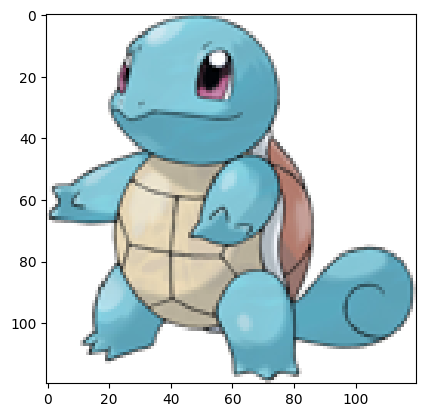

In [28]:
bulb1_path = os.path.join(data_dir, 'squirtle', 'png', 'sq1.png')
target_size = (120,120)
with open(bulb1_path, 'rb') as file:
    img = Image.open(file)
    img.load()
    if img.mode != 'RGB': # to keep the color information
        img = img.convert('RGB')
    print(np.shape(img))
    img = img.resize(target_size)
    img = np.array(img)
    plt.imshow(img)
    print(np.shape(img))


Since all the images are of different size, to create the dataset to perform t-SNE we need to resize them and turn them in to a numpy 1D vector.

We also need to label every image.

In [29]:
starters = {'squirtle':0, 'bulbasaur':1, 'charmander':2}
target_size = (120,120)
Y_starters = np.zeros((28,))
X_starters = []
first = True
i = 0

for starter in os.listdir(data_dir):
    images_path = os.path.join(data_dir, starter, 'png')

    for image in os.listdir(images_path):
        fp = os.path.join(images_path,image)

        with open(fp, 'rb') as file:

            img = Image.open(file)
            img.load()
            if img.mode != 'RGB': # to keep the color information
                img = img.convert('RGB')
            img = img.resize(target_size)
            img = np.array(img)
            img = img.flatten()
            if first:
                X_starters = img
                first = False
            else:
                X_starters = np.vstack([X_starters, img])
        Y_starters[i] = starters[starter]
        i += 1

Now we can finally perform t-SNE

In [30]:
# Perform t-SNE
tsne = TSNE(n_components=2, perplexity = 20, random_state=42)
X_starters_tsne = tsne.fit_transform(X_starters, )

<ipython-input-31-200802d13db7>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', 3)


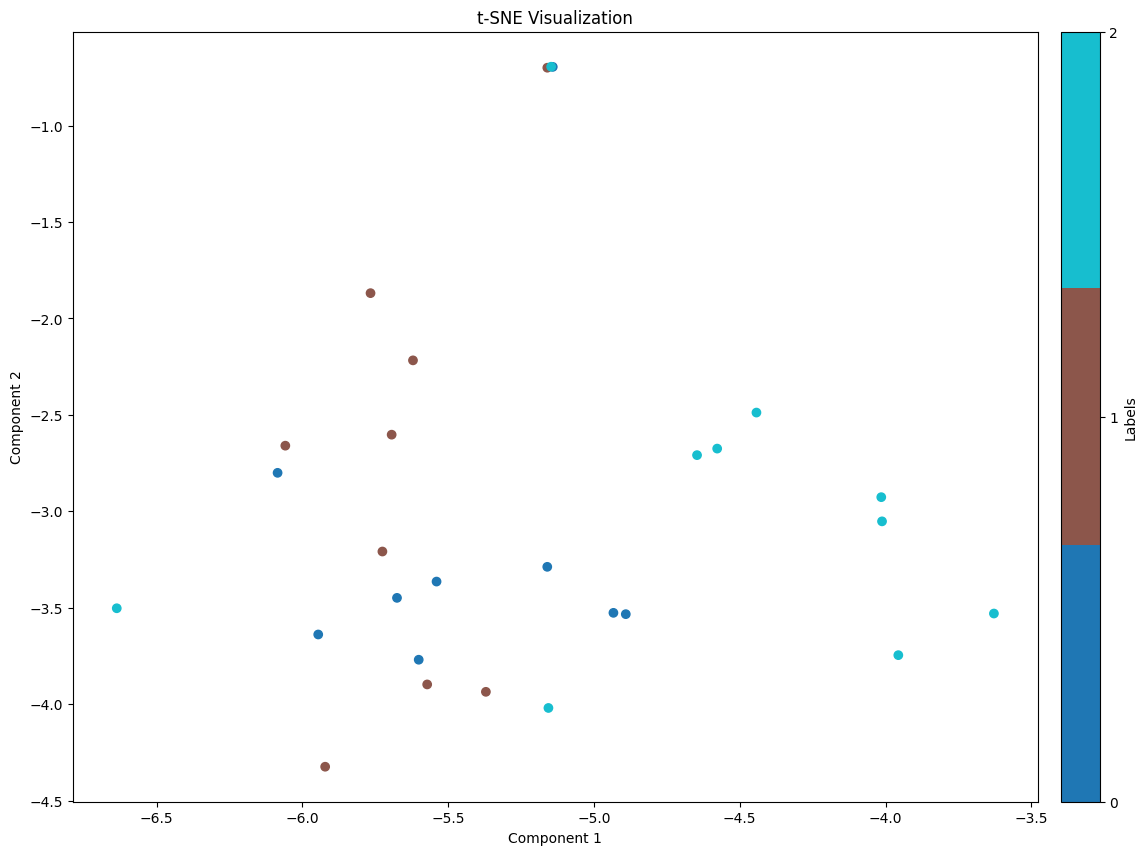

{'squirtle': 0, 'bulbasaur': 1, 'charmander': 2}


In [31]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Generate a colormap
cmap = cm.get_cmap('tab10', 3)

# Normalize the colorbar to have 18 discrete intervals
norm = mcolors.BoundaryNorm(np.arange(3) - 0.5, cmap.N)

# Scatter plot with color mapping based on labels
sc = ax.scatter(X_starters_tsne[:, 0], X_starters_tsne[:, 1], c=Y_starters, cmap=cmap)

# Add the colorbar outside the plot
cbar = plt.colorbar(sc, ax=ax, pad=0.02,  ticks=np.arange(3))
cbar.set_label('Labels')

# Set the title and labels
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()
print(starters)

- there are tree points at the very top, one for each category... what do you think is the reason?

we have 28 samples so it is very difficult to find a defined structure, but it's better than before for shure!